# Introduction to Data Science (CS4661). Cal State Univ. LA, CS Dept.
## Dr. Mo. Porhomayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


# Data Science in Python - Lab5

#### This is an introduction to some data sceince libraries/packages in python. Feel free to refer to the suggested resources and documentaries for more details.

----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

# You can adjust parameters:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# for training:  my_RandomForest.fit 
# for testing/prediction:  my_RandomForest.predict

# Model Evaluation and Visualization 


###    More on LOGISTIC REGRESSION:
#### Importing the sklearn class (machine learning algorithm) that you would like to use for modeling:

In [2]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Set up the Feature Matrix and Label Vector:

In [3]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:

cancer_df = pd.read_csv('/Users/mpourho/Documents/CSU/Courses/CS4661/Datasets/Cancer.csv')
#cancer_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS4661/master/cancer.csv')

# checking the dataset by printing every 10 lines:
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [4]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']

# print the first 5 rows
print(X.head())
print(y.head())

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

#### Splitting the Dataset:

In [5]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(439, 9)
(439,)
(110, 9)
(110,)


#### Defining (instantiating) an "object" from the sklearn class:

In [6]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()


#### Training Stage: Training a predictive model using the training dataset:


In [7]:
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [8]:
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0]


### Accuracy Evaluation:


In [9]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)


0.936363636364


## Estimating the Probability (likelihood) of happening an Event: 
##### As we mentioned before, Logistic Regression can also estimate the probability of happening the event (estimating the likelihood of each label) rather than just providing a binary prediction (see Logistic Regression lecture for more information).
##### Thus, we can adjust the True Positive Rate (TPR = Sensitivity) and False Positive Rate (FPR = False Alarm Rate) by changing the decision Threshold (see Model Evaluation lecture for more information).

In [10]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [11]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

342    0
231    1
524    0
459    0
477    0
116    0
512    0
286    0
40     1
449    1
301    0
141    0
455    0
430    0
335    0
203    1
157    1
531    1
471    0
77     0
1      0
204    1
522    0
382    0
330    1
307    0
103    1
209    1
65     1
108    1
      ..
20     1
457    1
129    1
540    0
7      0
337    0
374    0
266    0
304    0
521    0
443    1
514    0
24     1
38     1
225    1
444    1
277    0
41     0
419    0
120    1
89     1
483    1
23     1
12     1
146    1
291    0
529    0
32     1
334    0
72     0
Name: Malignant_Cancer, dtype: int64
[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0]
[[  9.64209930e-01   3.57900704e-02]
 [  2.25501131e-02   9.77449887e-01]
 [  9.81239809e-01   1.87601906e-02]
 [  9.61646403e-01   3.83535973e-02]
 [  9.65478110e-01   3.45218902e-02]
 [  9

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [13]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[ 0.          0.          0.01851852  0.01851852  0.01851852  0.03703704
  0.03703704  0.05555556  0.05555556  0.09259259  0.09259259  0.11111111
  0.11111111  0.38888889  0.42592593  0.46296296  0.51851852  0.53703704
  0.57407407  0.72222222  0.75925926  0.81481481  0.85185185  0.92592593
  0.98148148  1.        ]
[ 0.01785714  0.625       0.625       0.83928571  0.875       0.875
  0.91071429  0.91071429  0.96428571  0.96428571  0.98214286  0.98214286
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.        ]


# AUC:

In [14]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.987433862434


# ROC Curve:

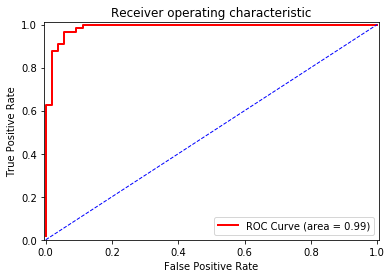

In [15]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Repeating the process with smaller number of features:

In [16]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols2 = ['Clump_Thickness','Mitoses']

# use the above list to select the features from the original DataFrame
X2 = cancer_df[feature_cols2] 

# select a Series of labels (the last column) from the DataFrame
y2 = cancer_df['Malignant_Cancer']

#Splitting the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

my_logreg2 = LogisticRegression()
my_logreg2.fit(X_train2,y_train2)

# Predicting the Binary Label:
y_predict_lr2 = my_logreg2.predict(X_test2)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr2 = my_logreg2.predict_proba(X_test2)

fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_predict_prob_lr2[:,1], pos_label=1)
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

0.926091269841


### Comparing the ROC Curves:

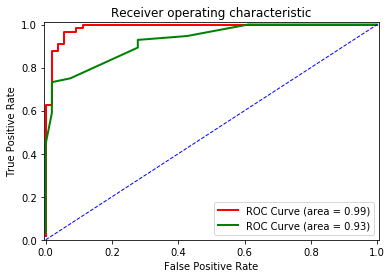

In [17]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# More on Visualization: Plotting KMeans Clustering Results

<function matplotlib.pyplot.show>

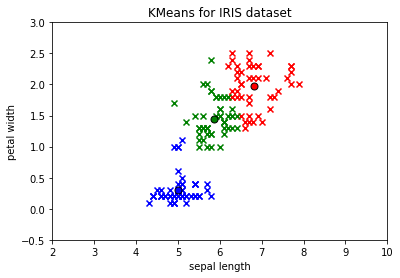

In [18]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

# KMeans Clustering for iris dataset:
iris_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS4661/master/iris.csv')

#feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
feature_cols = ['sepal_length','petal_width']
X = iris_df[feature_cols]

# Clustering:
my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(X)

# Assigned Labels after clustering: 
labels = my_KMeans.labels_

# Centers of the clusters:
centers = my_KMeans.cluster_centers_

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([2, 10])
plt.ylim([-0.5, 3])

# Labels, Title, Legend:
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('KMeans for IRIS dataset')

plt.show